## Final Project Submission


* Student name: Rodgers Bonaventure Odhiambo
* Student pace:part time 
* Scheduled project review date/time: 
* Instructor name: Samwel Jane
* Blog post URL:


# Project Overview

![movie.jpeg](https://images.unsplash.com/photo-1626814026160-2237a95fc5a0?auto=format&fit=crop&q=60&w=500&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTl8fG1vdmllfGVufDB8fDB8fHww)

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
title_basic=pd.read_csv('title.basics.csv')
gross_df=pd.read_csv('bom.movie_gross.csv')
ratings_df=pd.read_csv('title.ratings.csv')

# Title.Basic Data

The dataset contains information about movie titles and genres.

In [117]:
title_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [118]:
#checking data info
title_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [119]:
#cheking null values
title_basic.isna().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

# Movie Gross Data

The dataset provides information related to individual movies titles,year,studio,domestic gross and foreign gross.

In [120]:
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [121]:
#checking gross_df infomation
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [122]:
#checking null values
gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

 # Title Ratings Data

This dataset provides movie ratings and votes

In [123]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [124]:
#Checking null values
ratings_df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [125]:
#checing dataset information
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# Data preparation

# Data cleaning


In [126]:
#Droping raws with null values
title_basic.dropna(subset=['runtime_minutes','genres','original_title'],inplace=True)

In [127]:
gross_df['foreign_gross']=pd.to_numeric(gross_df['foreign_gross'], errors='coerce')

# Merging Datasets

Combining the three files sets to yield a single datasets for easier analysis 

In [128]:
# merging ratings and title basiet
merged_data = pd.merge(ratings_df,title_basic,on='tconst',how='inner')

#joining the merged data with 'gross_df' 
final_merge = merged_data.merge(gross_df.set_index(['title']),left_on='original_title', right_index=True, how='inner')
final_merge.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,2013
14,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011
15,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010
17,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,2011


In [129]:
final_merge.isna().sum()

tconst               0
averagerating        0
numvotes             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
studio               3
domestic_gross      18
foreign_gross      868
year                 0
dtype: int64

In [130]:
final_merge.dtypes

tconst              object
averagerating      float64
numvotes             int64
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
studio              object
domestic_gross     float64
foreign_gross      float64
year                 int64
dtype: object

In [131]:
#calculating mean
mean_foreign_gross = round(final_merge['foreign_gross'].mean(),1)
mean_foreign_gross

82333770.5

In [132]:
# Replace null values in 'foreign_gross' with mean_foreign_gross
final_merge['foreign_gross'] = final_merge['foreign_gross'].apply(lambda x: mean_foreign_gross if pd.isnull(x) else x)
final_merge['foreign_gross'] 

3         42400000.0
10          887000.0
14        34600000.0
15        72500000.0
17       485300000.0
            ...     
65210      7100000.0
65297     82333770.5
65423     82333770.5
65462      5000000.0
65598      9300000.0
Name: foreign_gross, Length: 2400, dtype: float64

In [133]:
final_merge.isna().sum()

tconst              0
averagerating       0
numvotes            0
primary_title       0
original_title      0
start_year          0
runtime_minutes     0
genres              0
studio              3
domestic_gross     18
foreign_gross       0
year                0
dtype: int64

In [135]:
final_merge.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross,year
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000.0,2014
10,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000.0,2013
14,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000.0,2011
15,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000.0,2010
17,tt1229238,7.4,428142,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",Par.,209400000.0,485300000.0,2011


# Analysis

# Genres by rating

Grouping genres by average ratings to get top 20 rated gernres

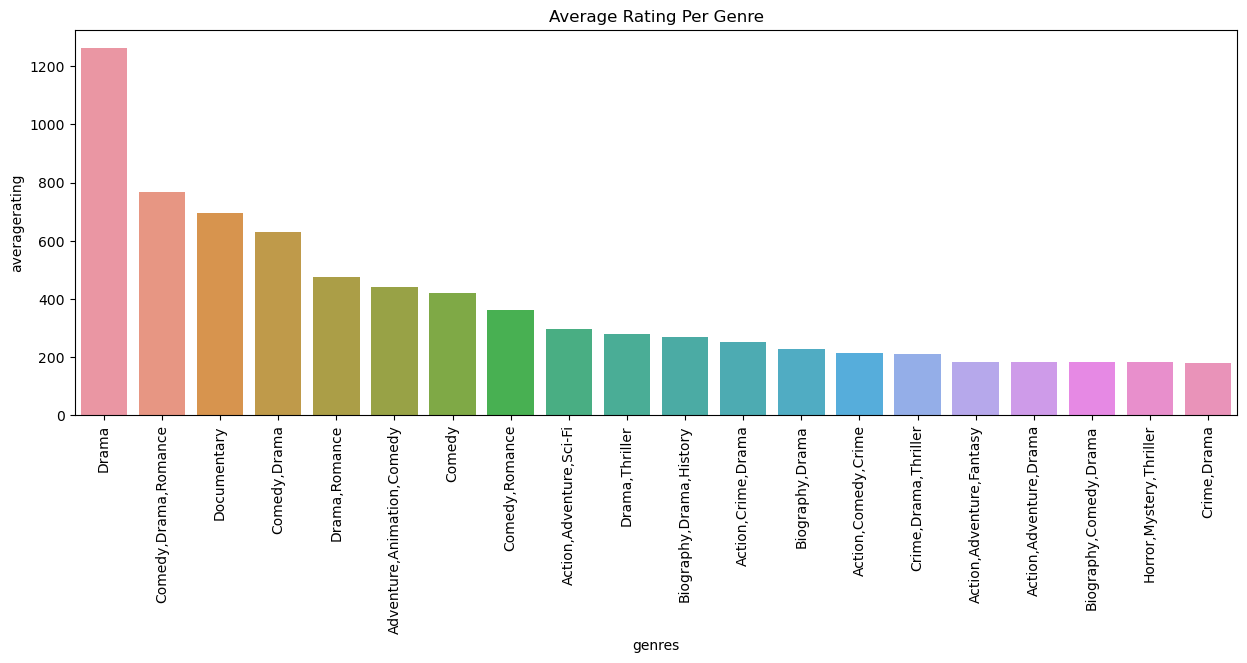

In [136]:
# Movie Genres Analysis by Average Ratings and Visualization
genres_by_rating = final_merge.groupby('genres')['averagerating'].sum().reset_index()
genres_by_rating

# Sort the DataFrame by 'averagerating' in descending order to find the top genres
genres_by_rating = genres_by_rating.sort_values(by='averagerating', ascending=False)

# Take only the top 10 genres
top_10_genres = genres_by_rating.head(20)
top_10_genres

plt.figure(figsize=(15,5))
sns.barplot(data=top_10_genres, x='genres', y='averagerating')
plt.title('Average Rating Per Genre')
plt.xticks(rotation=90)
plt.show()



# Movie Genre Trends: Total Numvotes and Runtime Minutes

Trend related to movie genres based on average numvotes and average runtime minutes

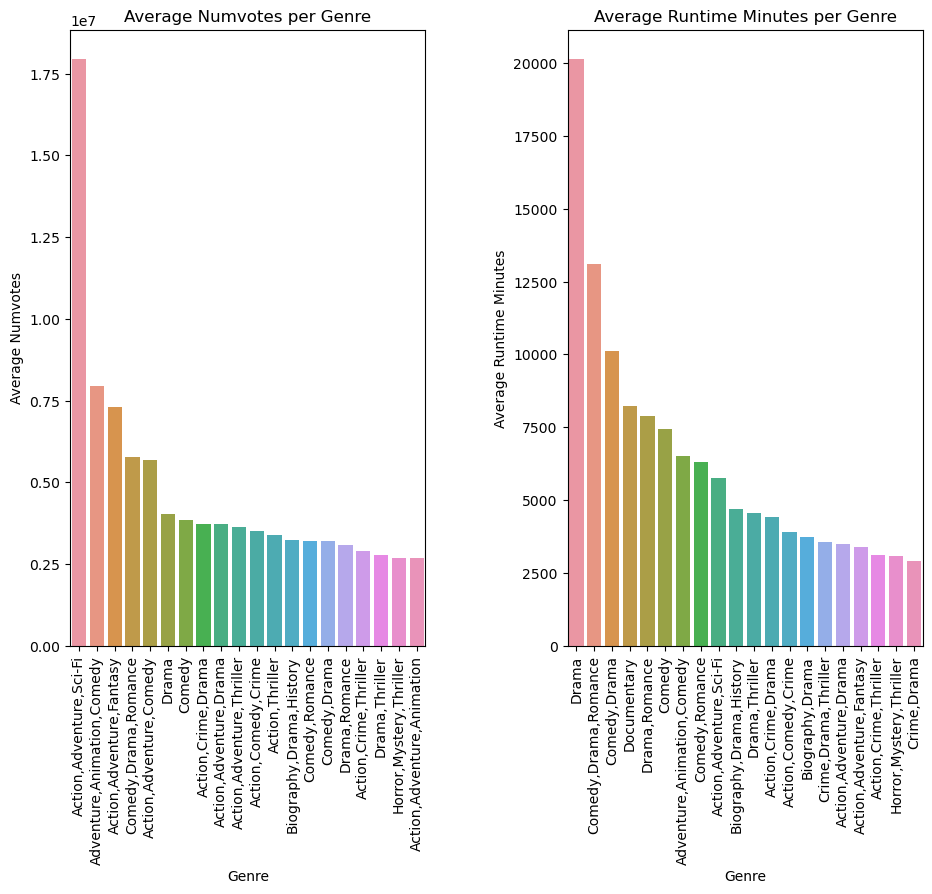

In [137]:
genre_trends = final_merge.groupby('genres')[['numvotes', 'runtime_minutes']].sum().reset_index()
plt.figure(figsize=(11, 8))
plt.subplots_adjust(wspace=0.4)

# Sort the DataFrame by 'averagerating' in descending order to find the top genres
genres_by_numvotes = genre_trends.sort_values(by='numvotes', ascending=False)
genres_by_runtime_minutes = genre_trends.sort_values(by='runtime_minutes', ascending=False)
top_10_genres = genres_by_numvotes.head(20)

top_10_genres_by_time = genres_by_runtime_minutes.head(20)
top_10_genres_by_time

# Plot 'numvotes' trend per genre
plt.subplot(121)
sns.barplot(data=top_10_genres, x='genres', y='numvotes')
plt.title('Average Numvotes per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Numvotes')
plt.xticks(rotation=90)

# Plot 'runtime_minutes' trend per genre
plt.subplot(122)
sns.barplot(data=top_10_genres_by_time, x='genres', y='runtime_minutes')
plt.title('Average Runtime Minutes per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime Minutes')
plt.xticks(rotation=90)
plt.show()

# Ratings yearly

Getting average ratings per year

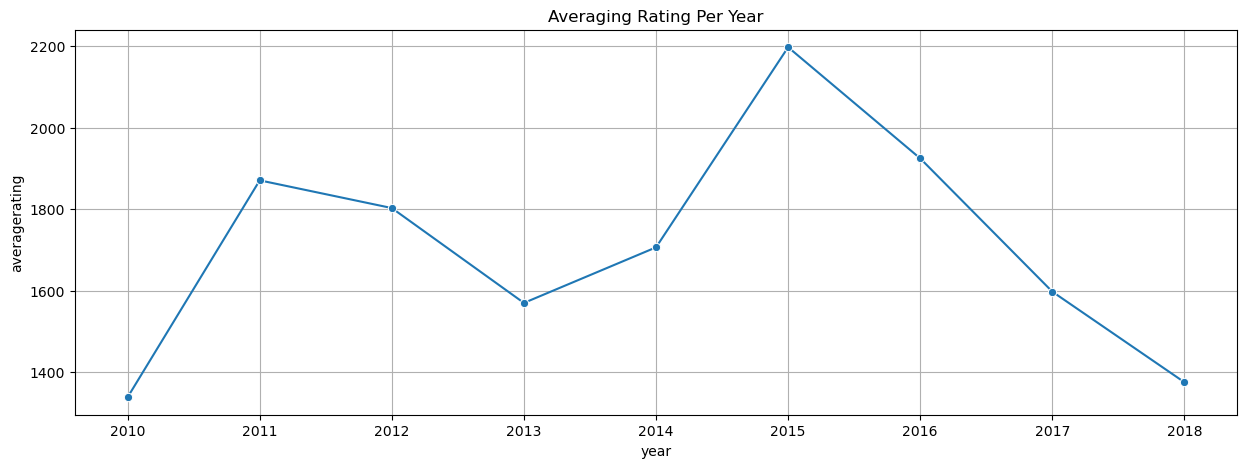

In [138]:
ratings_yearly = final_merge.groupby('year')['averagerating'].sum().reset_index()
ratings_yearly

plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='averagerating', data=ratings_yearly, marker='o')
plt.title('Averaging Rating Per Year')
plt.grid(True)
plt.show()

# Genres with the highest total gross earnings

 Shows total gross earnings for differnt movie genres and identifiers top 10 movies with the highest total gross earnings.

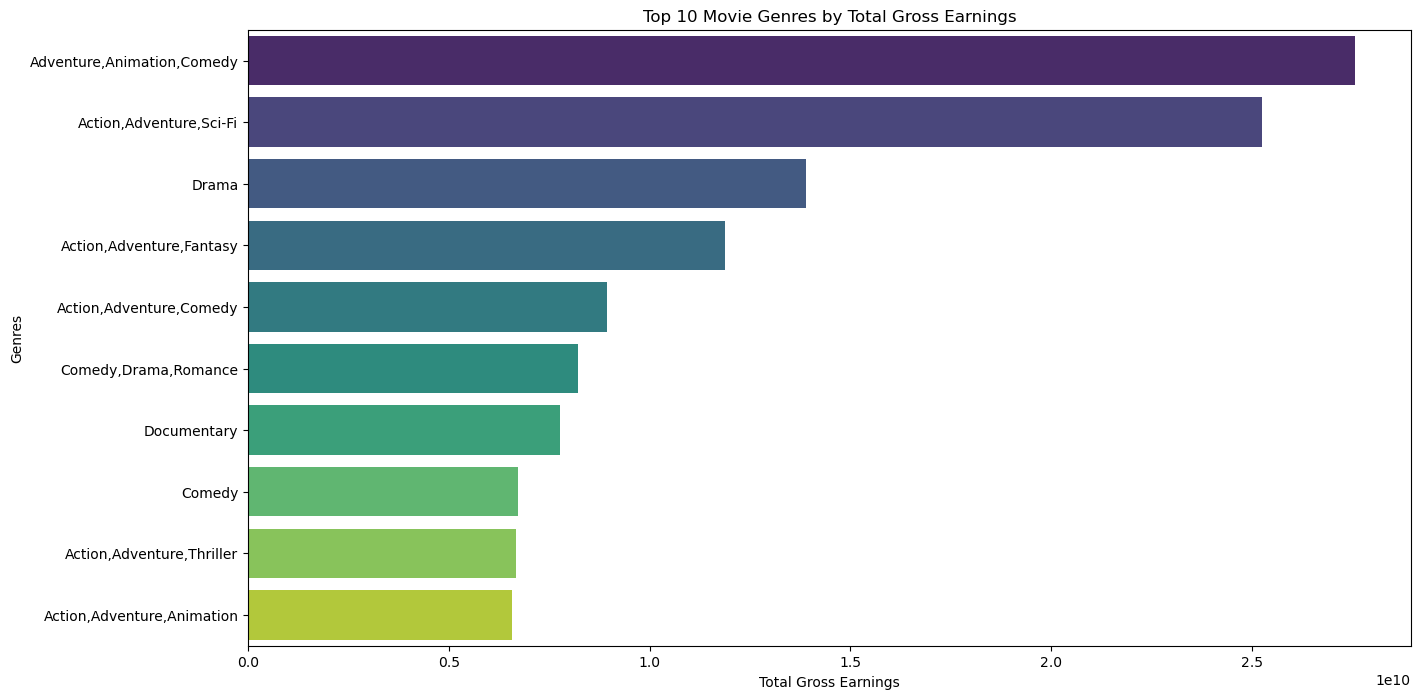

In [142]:

#calculating the average budget and ratings for different genres:
genre_analysis = final_merge.groupby('genres').agg({'domestic_gross':'sum','foreign_gross':'sum'}).reset_index()
genre_analysis

# Calculate a combined total gross column (domestic + foreign)
genre_analysis['total_gross'] = genre_analysis['domestic_gross'] + genre_analysis['foreign_gross']

# Sort the DataFrame by total gross in descending order and select the top 10 genres
top_10_genres = genre_analysis.sort_values(by='total_gross', ascending=False).head(10)

# Create a bar plot to visualize the top 10 genres
plt.figure(figsize=(15, 8))
sns.barplot(x='total_gross', y='genres', data=top_10_genres,palette='viridis')
plt.xlabel('Total Gross Earnings')
plt.ylabel('Genres')
plt.title('Top 10 Movie Genres by Total Gross Earnings')
plt.show()

# Ratings by Total Gross

comparing average ratings of movies to their total gross.

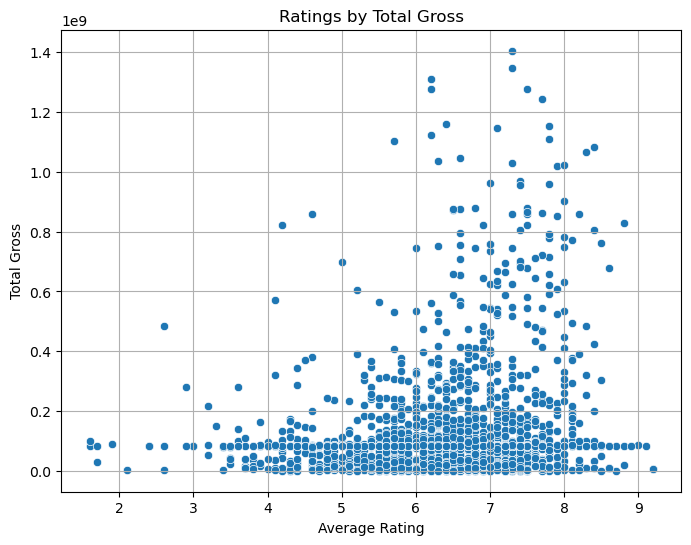

In [145]:
# Scatter plot of 'averagerating' vs. 'total_gross' (domestic_gross + foreign_gross)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='averagerating', y=final_merge['domestic_gross'] + final_merge['foreign_gross'], data=final_merge)
plt.title('Ratings by Total Gross')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross')
plt.grid()
plt.show()

# Conclusions

This analysis leads to three recomendatins for improving Microsoft's new movie studio.

1.Monitor Trends: Stay updated with the latest trends and preferences in movie genres. Audience preferences can change over time, so adapting to these changes is crucial for success.

2.Quality over Quantity: Instead of producing numerous movies in various genres, focus on delivering high-quality content. A well-crafted film in the right genre can outperform multiple mediocre ones.

3.Adapt to Audience Trends: Keep a close eye on changing audience preferences and trends. The movie industry is dynamic, and adapting to evolving tastes is essential.




# Next Steps

Further analysis could yield additional insights to further improve microsoft new movie studio:

1.Market Research: Conduct in-depth market research to understand audience preferences, emerging trends, and the competitive landscape.To refine your genre choices and identify potential gaps in the market consumer demands.

2.Audience Feedback: Gather feedback from test screenings and early releases to refine your movies before their official launch. Listen to your audience to make improvements and adjustments.
